# COCO Evaluation

This notebook evaluates the models from Table 2 in the original paper on the subset of categories of FSC-147 dataset that intersect with the categories from COCO dataset

## Imports

In [1]:
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm

# Set the CUDA device (because we ran this notebook on a cluster)
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

## Detectron2 library demonstration

Authors state in the paper that they use pretrained models from Detectron2 library for evaluation. Here we first test, how to make predictions with a model, loaded from that library

### Import the pretrained Mask R-CNN model from config file

In [2]:
# Code taken from https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=8IRGo8d0qkgR

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

### Test the predictor on a selected image and visualize the outputs

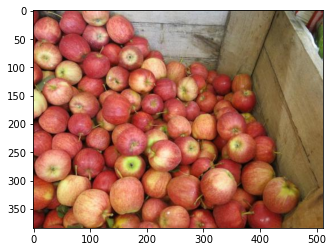

In [3]:
# The first image from "coco_test" split
img = cv2.imread("../data/images_384_VarV2/685.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
# Predicted bounding boxes
outputs = predictor(img)
outputs["instances"].pred_boxes

/home/domenv/conda/envs/reproducibility/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/domenv/conda/envs/reproducibility/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180487213/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Boxes(tensor([[  1.9543,  23.0036, 455.7465, 381.0971],
        [168.5845, 102.6354, 215.9333, 148.4727],
        [143.5501, 252.3122, 198.5272, 298.4102],
        [253.9409, 117.8847, 291.6411, 161.7512],
        [  1.0540,  54.7075,  51.6249, 105.6127],
        [403.6880, 294.8972, 471.5163, 361.3533],
        [368.4403, 265.6942, 427.3716, 328.8043],
        [149.7600,  62.1754, 195.2316, 107.3443],
        [324.1921, 178.4415, 377.3962, 229.8200],
        [248.6208, 220.5394, 294.0286, 272.9306],
        [334.4892, 216.9584, 394.9283, 271.7106],
        [127.4978,  98.7485, 169.7254, 144.7849],
        [279.4642, 181.9641, 325.8719, 229.3966],
        [350.3949, 139.4182, 395.0013, 180.8823],
        [140.8130, 202.5025, 202.8049, 256.1671],
        [133.4329, 293.7553, 196.0208, 362.3367],
        [  0.7559,  10.4191,  50.5064,  59.9949],
        [ 70.9219, 242.4520, 126.5871, 295.1404],
        [320.8331, 261.9622, 367.8195, 307.0498],
        [ 64.1822, 144.0305, 118.4676, 187.6

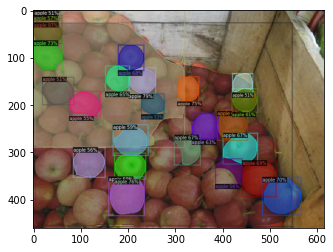

In [5]:
# Visualize the boxes
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

### Import the pretrained RetinaNet model from config file

In [6]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

Loading config /home/domenv/conda/envs/reproducibility/lib/python3.9/site-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [7]:
# Predicted bounding boxes
outputs = predictor(img)
outputs["instances"].pred_boxes

Boxes(tensor([[0.0000e+00, 1.1895e+01, 4.3804e+02, 3.8211e+02],
        [4.0460e+02, 2.9409e+02, 4.7388e+02, 3.6053e+02],
        [1.3486e+02, 2.9521e+02, 1.9714e+02, 3.6001e+02],
        [3.5172e+02, 1.3348e+02, 3.9187e+02, 1.7396e+02],
        [2.9597e+02, 2.7880e+02, 3.6154e+02, 3.4864e+02],
        [1.4371e+02, 2.5454e+02, 1.9964e+02, 2.9906e+02],
        [3.6831e+02, 2.6607e+02, 4.2689e+02, 3.2803e+02],
        [2.8741e+02, 1.4020e+02, 3.2630e+02, 1.8092e+02],
        [4.0058e+01, 2.9020e+02, 1.0061e+02, 3.4566e+02],
        [1.7458e-02, 9.0205e+01, 1.7652e+01, 1.3509e+02],
        [4.0339e-01, 2.9133e+02, 3.7603e+01, 3.5417e+02],
        [3.7492e+02, 3.3597e+02, 4.4014e+02, 3.8345e+02],
        [2.0185e+02, 2.2776e+02, 2.6363e+02, 2.8533e+02],
        [2.3613e+02, 2.9006e+02, 2.9724e+02, 3.5303e+02],
        [1.5424e+02, 1.3819e+02, 1.9193e+02, 1.7971e+02],
        [2.4883e+00, 9.7605e+00, 2.8455e+02, 2.9794e+02],
        [2.7937e+02, 1.8144e+02, 3.2560e+02, 2.2993e+02],
        

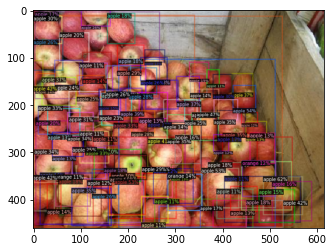

In [8]:
# Visualize the boxes
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

### Import the pretrained Faster R-CNN model from config file

In [9]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [10]:
# Predicted bounding boxes
outputs = predictor(img)
outputs["instances"].pred_boxes

Boxes(tensor([[1.1015e+01, 5.7685e+01, 4.6406e+02, 3.7603e+02],
        [1.4289e+02, 2.5247e+02, 1.9897e+02, 2.9869e+02],
        [4.0460e+02, 2.9327e+02, 4.7168e+02, 3.5859e+02],
        [3.5022e+02, 1.3985e+02, 3.9357e+02, 1.8106e+02],
        [1.3472e+02, 2.9431e+02, 1.9799e+02, 3.6008e+02],
        [8.2401e-01, 1.0953e-01, 2.8618e+02, 2.7324e+02],
        [2.5272e+02, 1.1971e+02, 2.9117e+02, 1.6161e+02],
        [3.4967e+02, 1.1214e+02, 3.8733e+02, 1.4616e+02],
        [3.1257e+00, 2.4422e+02, 6.8334e+01, 3.0421e+02],
        [3.6819e+02, 2.6535e+02, 4.2700e+02, 3.2697e+02],
        [2.2825e+02, 1.5673e+02, 2.7345e+02, 2.0025e+02],
        [2.7961e+02, 1.8169e+02, 3.2644e+02, 2.3005e+02],
        [3.9322e+01, 8.8852e+01, 8.6453e+01, 1.3129e+02],
        [3.2231e+02, 1.7849e+02, 3.7626e+02, 2.2922e+02],
        [5.3010e-01, 5.5555e+01, 5.1067e+01, 1.0480e+02],
        [2.4740e+02, 2.2017e+02, 2.9507e+02, 2.7313e+02],
        [7.1079e+01, 2.4197e+02, 1.2718e+02, 2.9770e+02]], device=

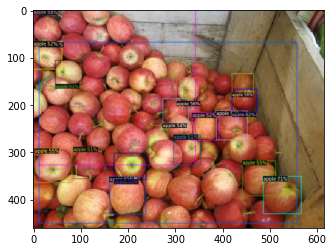

In [11]:
# Visualize the boxes
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

## Evaluate the models

Evaluate the selected 3 models on subcategories of FSC-147 dataset that also appear in COCO dataset. Below is a helper function, which we will run for evaluataion of every combination of model and data split.

In [2]:
anno_file = "../data/annotation_FSC147_384.json"
data_split_file = "../data/Train_Test_Val_FSC_147.json"
im_dir = "../data/images_384_VarV2"

with open(anno_file) as f:
    annotations = json.load(f)

with open(data_split_file) as f:
    data_split = json.load(f)

def run_evaluation(predictor, test_split):
    cnt = 0
    SAE = []  # sum of absolute errors
    SSE = [] # sum of square errors

    print("Evaluation on {} data".format(test_split))
    im_ids = data_split[test_split]
    pbar = tqdm(im_ids)

    for im_id in pbar:
        anno = annotations[im_id]
        dots = np.array(anno['points'])

        image = cv2.imread('{}/{}'.format(im_dir, im_id))
        output = predictor(image)

        gt = dots.shape[0]
        predicted = len(output["instances"])

        error = abs(gt - predicted)
        SAE.append(error)
        SSE.append(error**2)

        pbar.set_description('{:<8}: actual-predicted: {:6d}, {:6.1f}, error: {:6.1f}. Current MAE: {:5.2f}, RMSE: {:5.2f}'.\
                         format(im_id, gt, predicted, error, np.mean(SAE), np.sqrt(np.mean(SSE))))
        print("")

    return SAE, SSE

### Faster R-CNN

In [3]:
# Load the model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

# Evaluate on val and test set
faster_val = run_evaluation(predictor, "val_coco")
faster_test = run_evaluation(predictor, "test_coco")

Evaluation on val_coco data


  0%|          | 0/277 [00:00<?, ?it/s]

/home/domenv/conda/envs/reproducibility/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/domenv/conda/envs/reproducibility/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180487213/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]























































































































































































































































































Evaluation on test_coco data


  0%|          | 0/282 [00:00<?, ?it/s]

### RetinaNet

In [4]:
# Load the model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

# Evaluate on val and test set
retina_val = run_evaluation(predictor, "val_coco")
retina_test = run_evaluation(predictor, "test_coco")

Loading config /home/domenv/conda/envs/reproducibility/lib/python3.9/site-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


Evaluation on val_coco data


  0%|          | 0/277 [00:00<?, ?it/s]






















































































































































































































































































Evaluation on test_coco data


  0%|          | 0/282 [00:00<?, ?it/s]

### Mask R-CNN

In [5]:
# Load the model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

# Evaluate on val and test set
mask_val = run_evaluation(predictor, "val_coco")
mask_test = run_evaluation(predictor, "test_coco")

Evaluation on val_coco data


  0%|          | 0/277 [00:00<?, ?it/s]






















































































































































































































































































Evaluation on test_coco data


  0%|          | 0/282 [00:00<?, ?it/s]

### Store the results

In [6]:
print("Faster val:")
print("MAE:", np.mean(faster_val[0]))
print("RMSE:", np.sqrt(np.mean(faster_val[1])))
print()

print("Faster test:")
print("MAE:", np.mean(faster_test[0]))
print("RMSE:", np.sqrt(np.mean(faster_test[1])))
print()

print("Retina val:")
print("MAE:", np.mean(retina_val[0]))
print("RMSE:", np.sqrt(np.mean(retina_val[1])))
print()

print("Retina test:")
print("MAE:", np.mean(retina_test[0]))
print("RMSE:", np.sqrt(np.mean(retina_test[1])))
print()

print("Mask val:")
print("MAE:", np.mean(mask_val[0]))
print("RMSE:", np.sqrt(np.mean(mask_val[1])))
print()

print("Mask test:")
print("MAE:", np.mean(mask_test[0]))
print("RMSE:", np.sqrt(np.mean(mask_test[1])))
print()

Faster val:
MAE: 65.14079422382672
RMSE: 190.68512234696377

Faster test:
MAE: 49.07446808510638
RMSE: 101.54765153323288

Retina val:
MAE: 84.27436823104694
RMSE: 179.3214848975113

Retina test:
MAE: 68.60283687943263
RMSE: 93.12604894930205

Mask val:
MAE: 63.51263537906137
RMSE: 189.7504060772946

Mask test:
MAE: 48.663120567375884
RMSE: 101.57237226977934



In [ ]:
with open("../data/test_reproduced/coco_val_other", "w") as f:
    f.write("Faster R-CNN:\n")
    f.write("---MAE---\n")
    f.write(f"Mean: {np.mean(faster_val[0])}\n")
    f.write(f"SD: {np.std(faster_val[0])}\n")
    f.write("---RMSE---\n")
    f.write(f"Mean: {np.sqrt(np.mean(faster_val[1]))}\n\n")

    f.write("RetinaNet:\n")
    f.write("---MAE---\n")
    f.write(f"Mean: {np.mean(retina_val[0])}\n")
    f.write(f"SD: {np.std(retina_val[0])}\n")
    f.write("---RMSE---\n")
    f.write(f"Mean: {np.sqrt(np.mean(retina_val[1]))}\n\n")

    f.write("Mask R-CNN:\n")
    f.write("---MAE---\n")
    f.write(f"Mean: {np.mean(mask_val[0])}\n")
    f.write(f"SD: {np.std(mask_val[0])}\n")
    f.write("---RMSE---\n")
    f.write(f"Mean: {np.sqrt(np.mean(mask_val[1]))}\n")

with open("../data/test_reproduced/coco_test_other", "w") as f:
    f.write("Faster R-CNN:\n")
    f.write("---MAE---\n")
    f.write(f"Mean: {np.mean(faster_test[0])}\n")
    f.write(f"SD: {np.std(faster_test[0])}\n")
    f.write("---RMSE---\n")
    f.write(f"Mean: {np.sqrt(np.mean(faster_test[1]))}\n\n")

    f.write("RetinaNet:\n")
    f.write("---MAE---\n")
    f.write(f"Mean: {np.mean(retina_test[0])}\n")
    f.write(f"SD: {np.std(retina_test[0])}\n")
    f.write("---RMSE---\n")
    f.write(f"Mean: {np.sqrt(np.mean(retina_test[1]))}\n\n")

    f.write("Mask R-CNN:\n")
    f.write("---MAE---\n")
    f.write(f"Mean: {np.mean(mask_test[0])}\n")
    f.write(f"SD: {np.std(mask_test[0])}\n")
    f.write("---RMSE---\n")
    f.write(f"Mean: {np.sqrt(np.mean(mask_test[1]))}\n")